# Analysis for the Economy Indicator in the Boston City

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
from scipy.stats.distributions import chi2
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from math import sqrt

### Loading the dataframe

In [2]:
df = pd.read_csv("/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv")

### General Stats of the data

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df = pd.read_csv('/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv')
df.set_index('Year', inplace=True)
# Yearly average air temperature - calculation
df['average_logan_intl_flights'] = df.mean(axis=1)
# drop unwanted columns and resetting the datafreame
df = df[['average_logan_intl_flights']]
df.head()

### Let check whether the given data is random or not? 

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()

### Note: Yes, according to the scatter plot it shows that the data is randomly distributed.

### A Visualization of Logan International Flights with respect to Simple Moving Average for the period 3 years and 6 years

In [ ]:
# SMA over a period of 3 and 6 years 
df['SMA_5'] = df.average_logan_intl_flights.rolling(3, min_periods=1).mean()
df['SMA_10'] = df.average_logan_intl_flights.rolling(6, min_periods=1).mean()

# Grean = Avg Floghts, RED = 6 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange']
# Line plot 
df.plot(color=colors, linewidth=3, figsize=(8,6))
plt.legend(labels =['Average Logan International Flights', '3-years SMA', '6-years SMA'], fontsize=8)
plt.title('The yearly average Logan International Flights in Boston city', fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Flights', fontsize=10)

## 1. Identified the component and plot the data time vs key variables ( Logan International Flights & Logan Passengers) as per the Decomposition

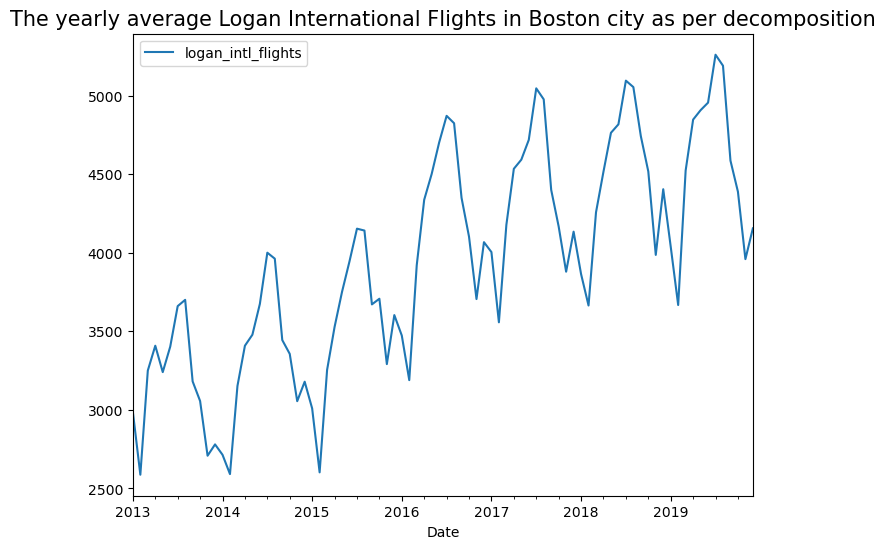

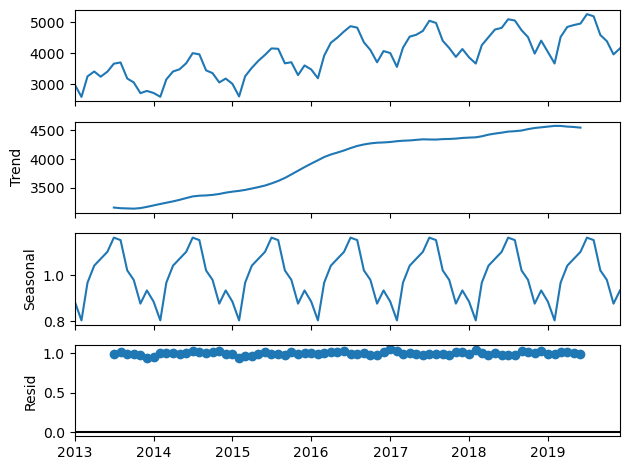

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv')

df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.plot(x='Date', y='logan_intl_flights', figsize=(8,6))
plt.title('The yearly average Logan International Flights in Boston city as per decomposition', fontsize=15)
df.set_index('Date', inplace=True)
analysis = df[['logan_intl_flights']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

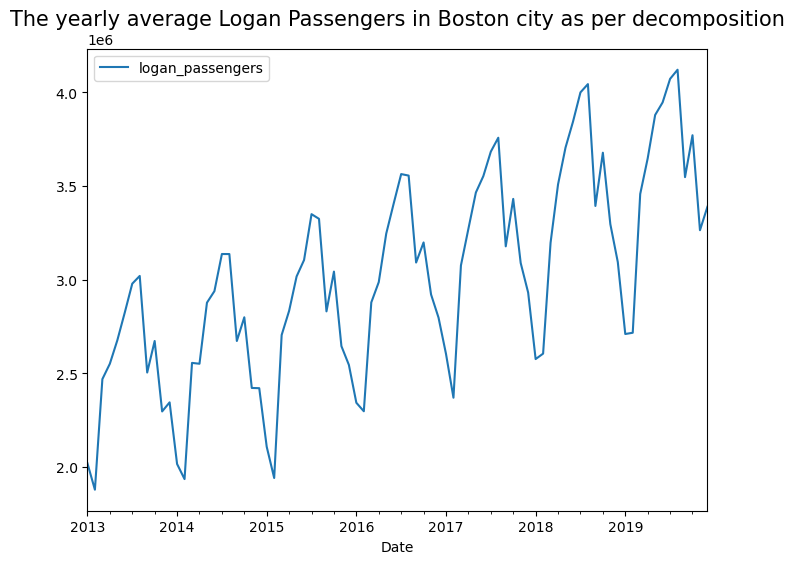

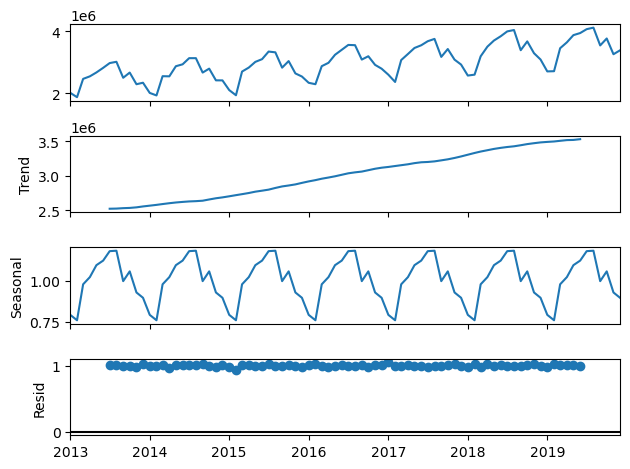

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv('/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv')

df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.plot(x='Date', y='logan_passengers', figsize=(8,6))
plt.title('The yearly average Logan Passengers in Boston city as per decomposition', fontsize=15)
df.set_index('Date', inplace=True)
analysis = df[['logan_passengers']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

### Behaviour of the International Flights and Passengers as per the Time Duration from 2013 to 2019

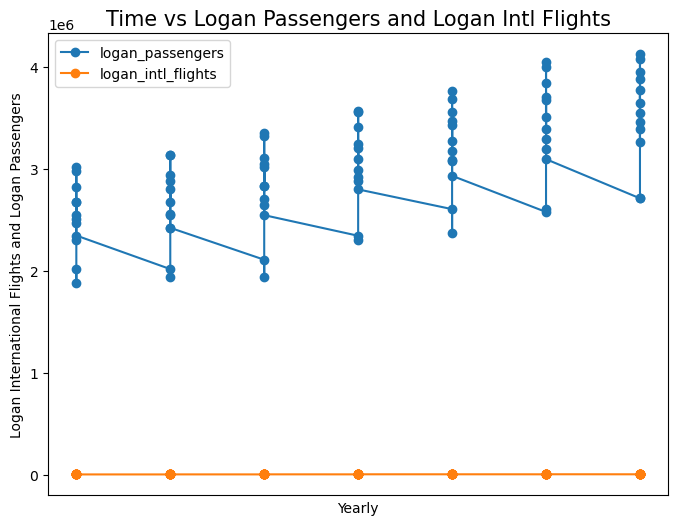

In [15]:
df = pd.read_csv('/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv')

df['Year'] = pd.to_datetime(df['Year'])

# Plotting multiple key features over time
key_features = ['logan_passengers', 'logan_intl_flights']  # Add your actual key feature names
plt.figure(figsize=(8, 6))

for feature in key_features:
    plt.plot(df['Year'], df[feature], marker='o', linestyle='-', label=feature)

plt.title('Time vs Logan Passengers and Logan Intl Flights', fontsize=15)
plt.xlabel('Yearly')
plt.ylabel('Logan International Flights and Logan Passengers')
plt.legend()
plt.show()

## 2. Checking the Time Series is Stationary or not by using the Augmented-Dickey-Fuller (ADF) test?

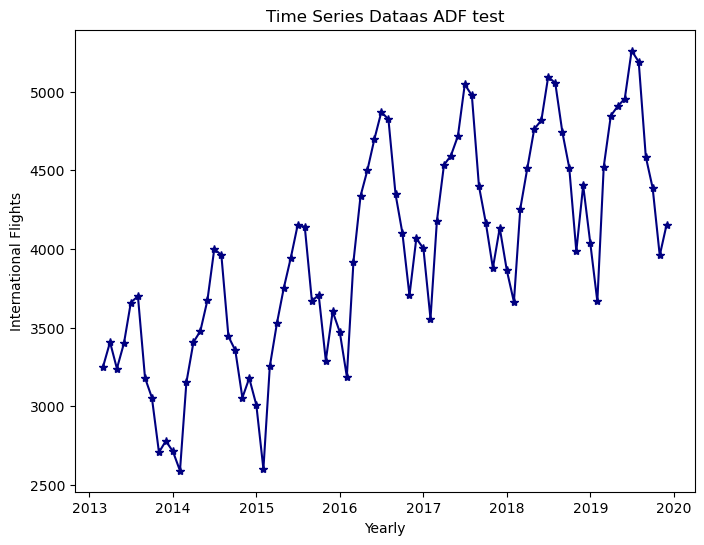

ADF Statistic: -2.078402633233402
p-value: 0.2532872122517936
Critical Values:
   1%: -3.528889992207215
   5%: -2.9044395987933362
   10%: -2.589655654274312
The time series is likely non-stationary (fail to reject the null hypothesis)


In [9]:
df['Year'] = pd.to_datetime(df['Year'])

# Plot the original time series data
plt.figure(figsize=(8, 6))
plt.plot(df['logan_intl_flights'], marker='*', color='navy', linestyle='-')
plt.title('Time Series Dataas ADF test')
plt.xlabel('Yearly')
plt.ylabel('International Flights')
plt.show()

# Take the first difference
df['stationary_data'] = df['logan_intl_flights'] - df['logan_intl_flights'].shift(1)

# Perform Augmented Dickey-Fuller test
result = adfuller(df['logan_intl_flights'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

### Note: As per the ADF test I found that the time series is not stationary as the p-value is greater than the 0.05

## Checking the Time Series is Stationary or not by using the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test?

In [ ]:
from statsmodels.tsa.stattools import kpss

time_series = df['logan_intl_flights']

# Plot the time series
plt.figure(figsize=(8, 6))
plt.plot((time_series), marker='o')
plt.title('Time Series Data as KPSS Test')
plt.xlabel('Yearly')
plt.ylabel('Logan International Flights')
plt.show()

# Perform Kwiatkowski-Phillips-Schmidt-Shin test
result = kpss(time_series)

# Extract and print the test results
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print(f'KPSS Statistic: {kpss_statistic}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the test results
alpha = 0.05
if p_value < alpha:
    print("Result: The time series is not stationary (reject the null hypothesis)")
else:
    print("Result: The time series is stationary (fail to reject the null hypothesis)")

### Note: After doing the KPSS test, again the result is same that the time series is not stationary and it rejec ts the null hypothesis

## 3. Applying the Differencing Technique to make the time series stationary.

In [ ]:
df.shape

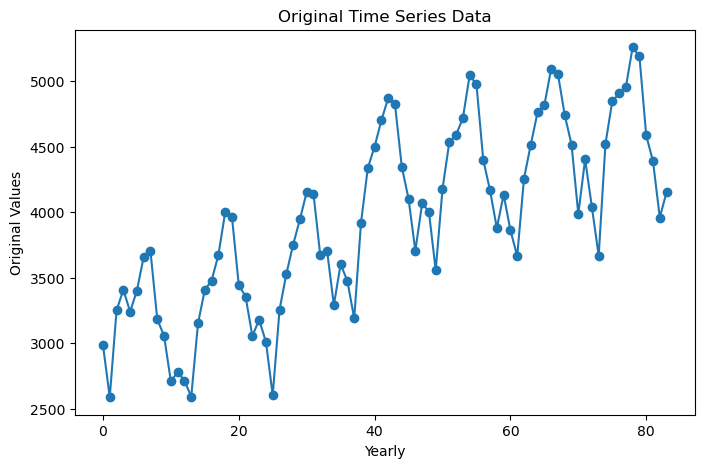

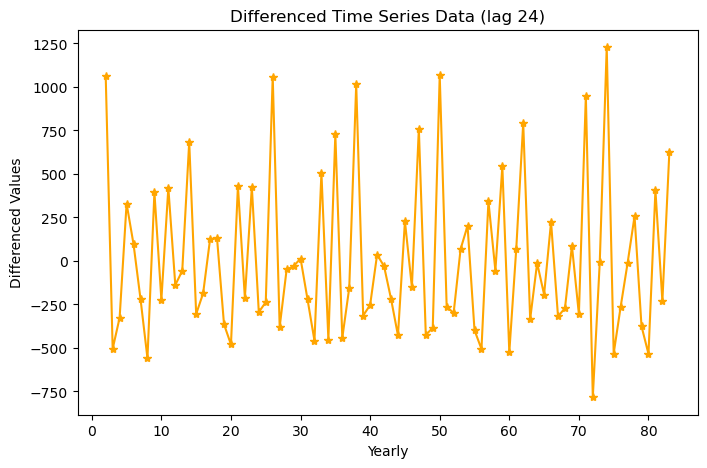

ADF Statistic: -13.171270506497267
p-value: 1.249002760595815e-24
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957
The time series is likely stationary (reject the null hypothesis)


In [3]:
#df['Year'] = pd.to_datetime(df['Year'])

# Plot the original time series data
plt.figure(figsize=(8, 5))
plt.plot(df['logan_intl_flights'], marker='o', linestyle='-')
plt.title('Original Time Series Data')
plt.xlabel('Yearly')
plt.ylabel('Original Values')
plt.show()


df['logan_stationary']=df['logan_intl_flights'].diff().diff()
# Take the first difference with a lag of 24
#df['stationary_data_24'] = df['logan_intl_flights'] - df['logan_intl_flights'].shift()

# Plot the differenced time series data
plt.figure(figsize=(8, 5))
plt.plot(df['logan_stationary'], color='orange', marker='*', linestyle='-')
plt.title('Differenced Time Series Data (lag 24)')
plt.xlabel('Yearly')
plt.ylabel('Differenced Values')
plt.show()

# Take the second difference with a lag of 12
#df['stationary_data_12'] = df['stationary_data_24'] - df['stationary_data_24'].shift(12)

# Plot the differenced time series data
#plt.figure(figsize=(8, 6))
#plt.plot(df['Year'], df['stationary_data_12'], marker='*', linestyle='-')
#plt.title('Differenced Time Series Data (lag 12)')
#plt.xlabel('Yearly')
#plt.ylabel('Differenced Value')
#plt.show()

# Take the first difference
#df['stationary_data'] = df['stationary_data_12'] - df['stationary_data_12'].shift(1)

# Plot the third difference time series data with a lag of 1
#plt.figure(figsize=(8, 5))
#plt.plot(df['stationary_data'], color='brown', marker='*', linestyle='-')
#plt.title('Differenced Time Series Data (lag 1)')
#plt.xlabel('Yearly')
#plt.ylabel('Differenced Values')
#plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(df['logan_stationary'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

In [4]:
df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [5]:
df=df[2:]

Mean Absolute Error 212.43580264345053
predicted=764.006729, expected=949.000000
predicted=-508.317921, expected=-783.000000
predicted=96.415909, expected=-7.000000
predicted=724.290375, expected=1228.000000
predicted=-282.238634, expected=-532.000000
predicted=26.424697, expected=-264.000000
predicted=-245.701229, expected=-12.000000
predicted=255.515707, expected=257.000000
predicted=-359.539927, expected=-375.000000
predicted=-203.276198, expected=-534.000000
predicted=17.028579, expected=406.000000
predicted=-288.671206, expected=-231.000000
predicted=751.666465, expected=625.000000


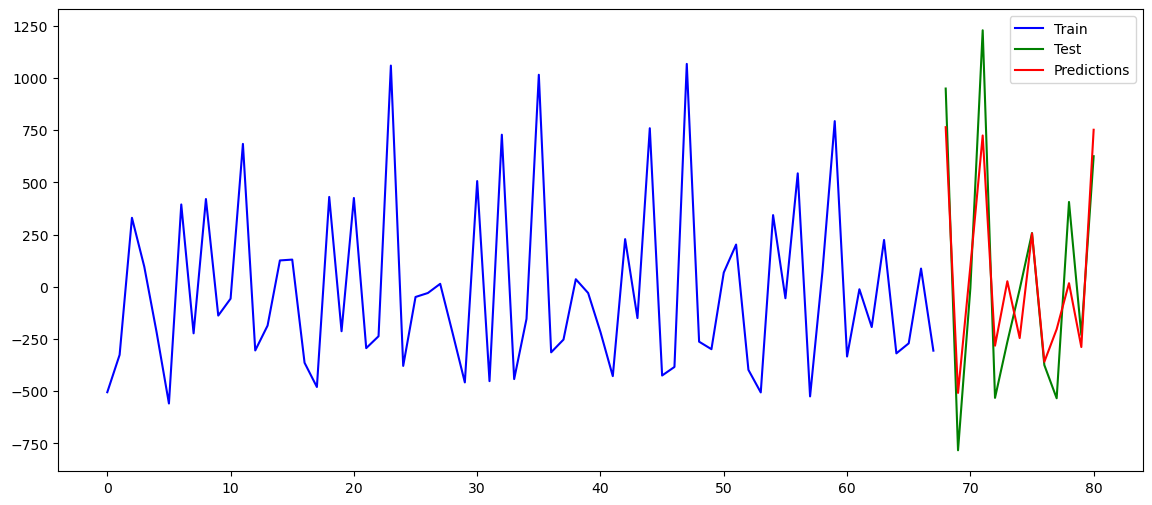

[-505. -326.  330.   96. -218. -559.  394. -223.  420. -138.  -57.  684.
 -305. -186.  126.  130. -364. -480.  430. -213.  425. -294. -237. 1059.
 -379.  -49.  -30.   14. -220. -458.  506. -452.  728. -442. -154. 1015.
 -314. -253.   36.  -30. -217. -428.  228. -150.  759. -425. -384. 1067.
 -263. -299.   68.  202. -398. -506.  343.  -55.  543. -525.   70.  793.
 -334.  -12. -193.  224. -319. -271.   87. -306.] [ 949. -783.   -7. 1228. -532. -264.  -12.  257. -375. -534.  406. -231.
  625.]


In [6]:
df.set_index('Date', inplace=True)
X = df['logan_stationary'].values
train, test = X[1:len(X)-13], X[len(X)-13:]
model = AutoReg(train, lags=11)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
mse = mean_absolute_error(test, predictions)   
print("Mean Absolute Error", mse)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_absolute_error(test, predictions))
pyplot.figure(figsize=(14, 6))
pyplot.plot(range(len(train)), train, color='blue', label='Train')
pyplot.plot(range(len(train), len(train) + len(test)), test, color='green', label='Test')
pyplot.plot(range(len(train), len(train) + len(test)), predictions, color='red', label='Predictions')
pyplot.legend()
pyplot.show()
print(train,test)

Mean Absolute Error: 212.43580264345053
predicted=764.006729, expected=949.000000
predicted=-508.317921, expected=-783.000000
predicted=96.415909, expected=-7.000000
predicted=724.290375, expected=1228.000000
predicted=-282.238634, expected=-532.000000
predicted=26.424697, expected=-264.000000
predicted=-245.701229, expected=-12.000000
predicted=255.515707, expected=257.000000
predicted=-359.539927, expected=-375.000000
predicted=-203.276198, expected=-534.000000
predicted=17.028579, expected=406.000000
predicted=-288.671206, expected=-231.000000
predicted=751.666465, expected=625.000000


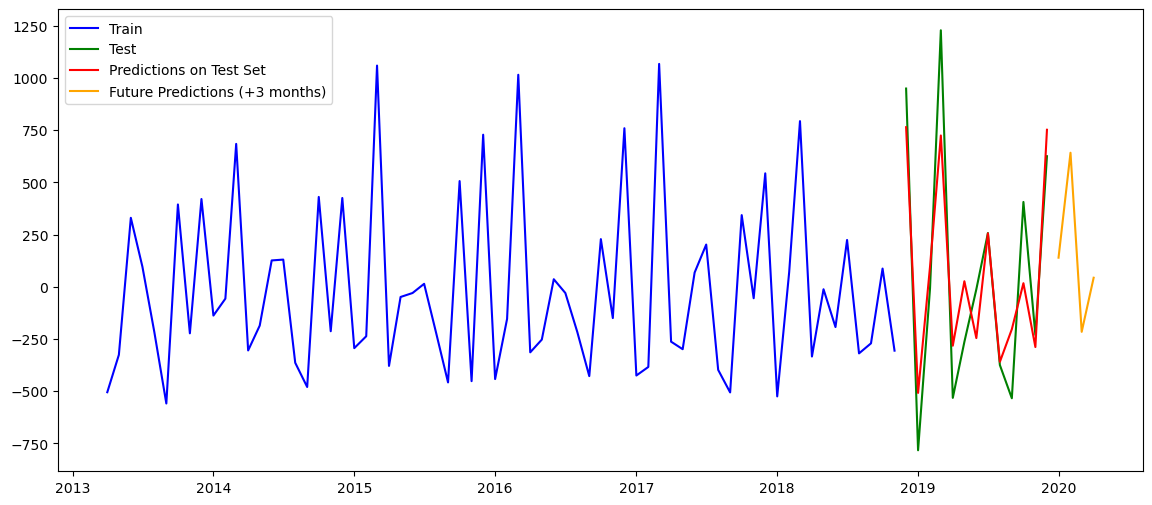

Train Set: [-505. -326.  330.   96. -218. -559.  394. -223.  420. -138.  -57.  684.
 -305. -186.  126.  130. -364. -480.  430. -213.  425. -294. -237. 1059.
 -379.  -49.  -30.   14. -220. -458.  506. -452.  728. -442. -154. 1015.
 -314. -253.   36.  -30. -217. -428.  228. -150.  759. -425. -384. 1067.
 -263. -299.   68.  202. -398. -506.  343.  -55.  543. -525.   70.  793.
 -334.  -12. -193.  224. -319. -271.   87. -306.]
Test Set: [ 949. -783.   -7. 1228. -532. -264.  -12.  257. -375. -534.  406. -231.
  625.]


In [8]:
from pandas import date_range
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.api import AutoReg

# Assuming df is your DataFrame and 'Date' is the name of the datetime column
#df.set_index('Date', inplace=True)

# Extract the time series data
X = df['logan_stationary'].values

# Split the data into train and test sets
train, test = X[1:len(X)-13], X[len(X)-13:]

# Fit the AutoReg model
model = AutoReg(train, lags=11)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate Mean Absolute Error
mse = mean_absolute_error(test, predictions)
print("Mean Absolute Error:", mse)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

# Forecast future values
forecast_steps = 3  # Change this to the number of steps you want to forecast into the future
future_dates = date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(X), end=len(X) + forecast_steps, dynamic=False)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df.index[1:len(X)-13], train, color='blue', label='Train')
plt.plot(df.index[len(X)-13:], test, color='green', label='Test')
plt.plot(df.index[len(X)-13:], predictions, color='red', label='Predictions on Test Set')
plt.plot(future_dates, future_predictions, color='orange', label=f'Future Predictions (+{forecast_steps} months)')
plt.legend()
plt.show()

# Print train and test sets
print("Train Set:", train)
print("Test Set:", test)

## 4. Moving to the next step to build a model by using ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

data_flight = df['logan_stationary']
#data_passenger = df['logan_passengers']

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(8, 6))
plot_acf(data_flight, lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF) plot for Logan International Flights')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the Autocorrelation Function (ACF)
#plt.figure(figsize=(8, 6))
#plot_acf(data_passenger, lags=30, alpha=0.05)
#plt.title('Partial Autocorrelation Function (ACF) plot for Logan Passengers')
#plt.xlabel('Lag')
#plt.ylabel('Autocorrelation')
#plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

data_flight = df['logan_stationary']
#data_passenger = df['logan_passengers']

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(8, 6))
plot_pacf(data_flight, lags=30)
plt.title('Partial Autocorrelation Function (PACF) plot for Logan International Flights')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
#plt.figure(figsize=(8, 6))
#plot_pacf(data_passenger, lags=30, alpha=0.05)
#plt.title('Partial Autocorrelation Function (PACF) plot for Logan Passengers')
#plt.xlabel('Lag')
#plt.ylabel('Partial Autocorrelation')
#plt.show()

## 5. Implementing the AR and MA model in the Time Series Analysis

In [ ]:


time_series = df['logan_stationary']

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit the AutoRegressive (AR) model
order_of_model = 1  # Change this value based on the order of your desired AR model
ar_model = AutoReg(train, lags=order_of_model)
ar_results = ar_model.fit()

# Make predictions on the test set
predictions = ar_results.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the performance of the model (optional)
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(test, label='Actaul Model')
plt.plot(predictions, color='black', label='AR Model Predictions')
plt.legend()
plt.title('Autoregressive (AR) model', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()
print(ar_results.summary())

/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


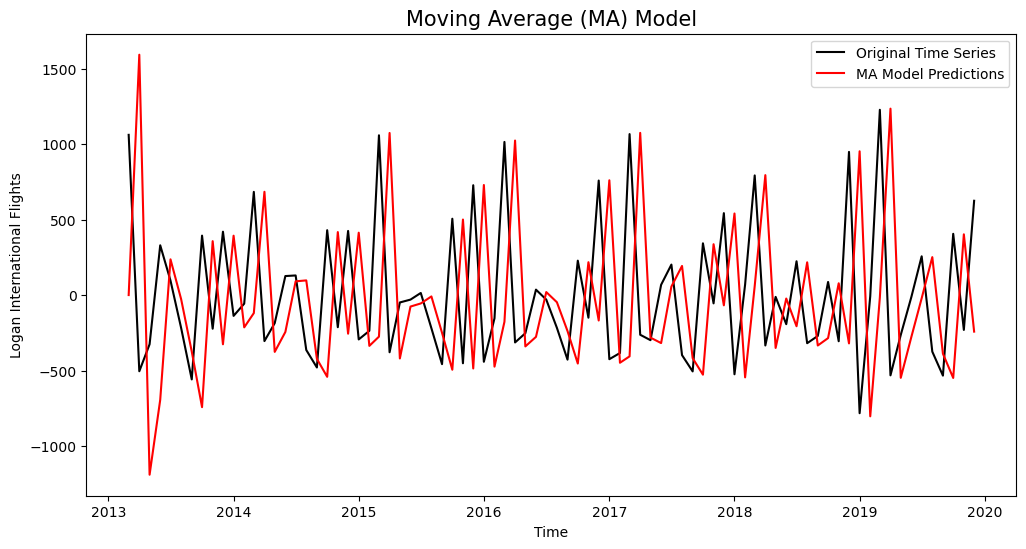

                               SARIMAX Results                                
Dep. Variable:       logan_stationary   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -644.757
Date:                Sun, 10 Dec 2023   AIC                           1293.514
Time:                        21:48:34   BIC                           1298.278
Sample:                    03-01-2013   HQIC                          1295.424
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9993      5.632     -0.177      0.859     -12.037      10.038
sigma2      5.681e+05   3.22e+06      0.176      0.860   -5.75e+06    6.88e+06
Ljung-Box (L1) (Q):                  25.48   Jarque-

In [11]:
from statsmodels.tsa.arima.model import ARIMA

time_series = df['logan_stationary']

# Define the order of the MA model
order = (0, 2, 1)  # (p-autoregressive, d-differencing, q-moving average)

# Fit the MA model
ma_model = ARIMA(time_series, order=order)
ma_results = ma_model.fit()

# Generate predictions
predictions = ma_results.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='black')
plt.plot(predictions, label='MA Model Predictions', color='red')
plt.legend()
plt.title('Moving Average (MA) Model', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()
print(ma_results.summary())

## 6. Implementing the AR+I+MA model for forecasting the data

/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


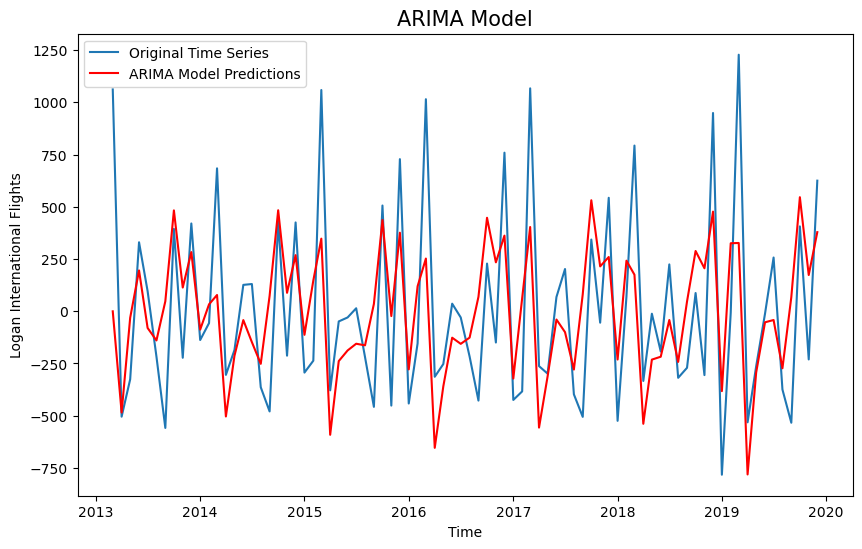

                               SARIMAX Results                                
Dep. Variable:       logan_stationary   No. Observations:                   82
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -595.668
Date:                Sun, 10 Dec 2023   AIC                           1199.336
Time:                        21:48:36   BIC                           1208.963
Sample:                    03-01-2013   HQIC                          1203.201
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5975      1.838     -0.325      0.745      -4.201       3.006
ar.L1          0.0880      0.158      0.558      0.577      -0.221       0.397
ma.L1         -1.0000      0.192     -5.196      0.0

In [12]:
# Define the order of the ARIMA model
order = (1, 0, 1)  # (p-autoregressive, d-differencing, q-moving average)

# Fit the ARIMA model
arima_model = ARIMA(time_series, order=order)
arima_results = arima_model.fit()

# Generate predictions
predictions = arima_results.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(predictions, label='ARIMA Model Predictions', color='red')
plt.legend()
plt.title('ARIMA Model', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()
print(arima_results.summary())

In [ ]:
forecast_steps = 100  # The number of steps want to forecast
forecast_index = pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='D')
forecast = arima_results.forecast(steps=forecast_steps)

# Plot the original time series, past values, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(forecast_index[1:], forecast, label='ARIMA Forecast', color='maroon')
plt.legend()
plt.title('ARIMA Forecast', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()

In [16]:
df

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,...,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,logan_stationary,Date
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,...,106386,128,6,6,400000,479,12,0,1062.0,2013-03-01
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,...,350000,254,14,8,403000,558,91,24,-505.0,2013-04-01
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,...,457374,402,12,4,425500,809,63,0,-326.0,2013-05-01
5,2013,6,2824862,3402,0.911,244.45,329151,0.070,0.645,482,...,632666,405,14,13,445000,864,352,47,330.0,2013-06-01
6,2013,7,2978718,3660,0.886,221.20,329650,0.068,0.645,1376,...,1482428,1029,19,11,429000,909,462,44,96.0,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,8,4120937,5190,0.888,270.54,392536,0.027,0.676,176,...,1144908,931,0,0,0,0,0,0,-375.0,2019-08-01
80,2019,9,3547546,4586,0.895,312.37,385445,0.028,0.665,286,...,416015,307,0,0,0,0,0,0,-534.0,2019-09-01
81,2019,10,3771212,4388,0.907,313.17,390983,0.023,0.671,393,...,1261737,972,0,0,0,0,0,0,406.0,2019-10-01
82,2019,11,3264105,3959,0.803,238.82,391531,0.021,0.670,480,...,688168,539,0,0,0,0,0,0,-231.0,2019-11-01


In [21]:
from pandas import date_range

#df.set_index('Date', inplace=True)
forecast_steps = 3
X = df['logan_stationary'].values
#train, test = X[:len(X)-13], X[len(X)-13:]

model = AutoReg(train, lags=11)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
future_dates = date_range(start=df['Date'].index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps, dynamic=False)

pyplot.figure(figsize=(12, 6))
plt.title('ARIMA Forecast Predictions of Logan International Flights for the next 3 months', fontsize=15)
pyplot.plot(df.index[:-14], train, color='blue', label='Train')
pyplot.plot(df.index[-13:], test, color='green', label='Test')
pyplot.plot(df.index[-13:], predictions, color='red', label='Predictions on Test Set')
pyplot.plot(future_dates, future_predictions, color='orange', 
            label=f'Future Predictions (+{forecast_steps} months)')
pyplot.legend()
pyplot.show()
print(len(train), len(test))

KeyError: 'Date'

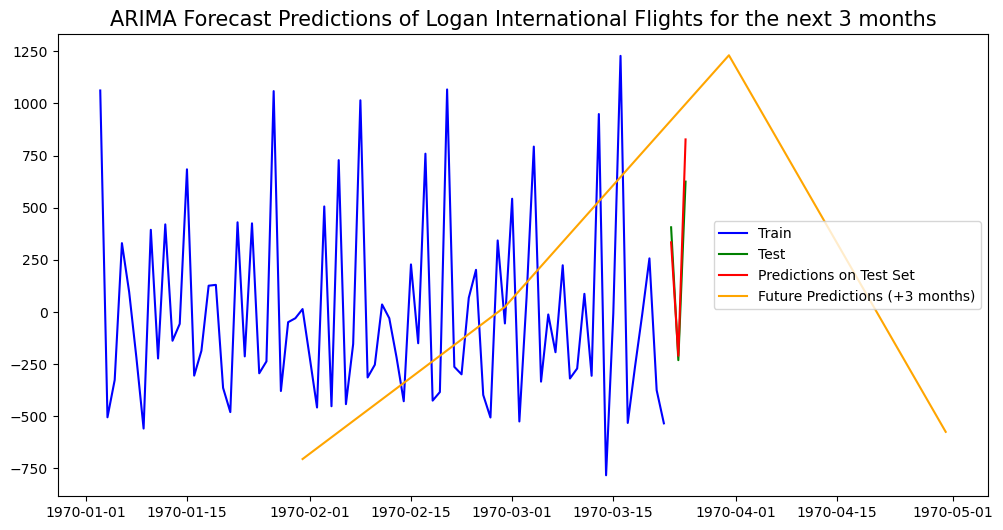

In [9]:
from pandas import date_range
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import AutoReg
import numpy as np

forecast_steps = 3
X = df['logan_stationary'].values

# Assuming you have a train and test split
train, test = X[:len(X)-forecast_steps], X[len(X)-forecast_steps:]

# Fit the model
model = AutoReg(train, lags=11)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Make future predictions
future_dates = date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(X), end=len(X) + forecast_steps, dynamic=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.title('ARIMA Forecast Predictions of Logan International Flights for the next 3 months', fontsize=15)
plt.plot(df.index[:-forecast_steps], train, color='blue', label='Train')
plt.plot(df.index[-forecast_steps:], test, color='green', label='Test')
plt.plot(df.index[-forecast_steps:], predictions, color='red', label='Predictions on Test Set')
plt.plot(future_dates, future_predictions, color='orange', 
         label=f'Future Predictions (+{forecast_steps} months)')
plt.legend()
plt.show()


## Analysis towards the Logan Passengers 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df) * 0.9)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]
end_index_forecast = test_data.index[-1]

# Fit the best AR and MA models on the training data
best_model_ar = SARIMAX(train_data['logan_passengers'], order=(8,0,0), enforce_stationarity=False)
best_results_ar = best_model_ar.fit(disp=False, maxiter=1000)

best_model_ma = SARIMAX(train_data['logan_passengers'], order=(0,0,9), enforce_stationarity=False)
best_results_ma = best_model_ma.fit(disp=False, maxiter=1000)

# Forecasting on the test set
forecast_ar = best_results_ar.get_forecast(steps=len(test_data))
forecast_mean_ar = forecast_ar.predicted_mean

# Diagnostic plots
plt.figure(figsize=(8, 6))
best_results_ar.plot_diagnostics()
plt.show()

print(best_results_ar.summary())

In [ ]:
from pandas import date_range

forecast_steps = 3
X = df['logan_passengers'].values
train, test = X[:len(X)-13], X[len(X)-13:]

model = AutoReg(train, lags=12)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
future_dates = date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps, dynamic=False)

pyplot.figure(figsize=(12, 6))
plt.title('ARIMA Forecast Predictions of Logan Passengers for the next 3 months', fontsize=15)
pyplot.plot(df.index[:-13], train, color='blue', label='Train')
pyplot.plot(df.index[-13:], test, color='green', label='Test')
pyplot.plot(df.index[-13:], predictions, color='red', label='Predictions on Test Set')
pyplot.plot(future_dates, future_predictions, color='orange', 
            label=f'Future Predictions (+{forecast_steps} months)')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv')

train_size = int(len(df) * 0.9)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]
end_index_forecast = test_data.index[-1]

# Fit the best AR and MA models on the training data
best_model_ar = SARIMAX(train_data['logan_intl_flights_diff2'], order=(8,0,0)
best_results_ar = best_model_ar.fit(disp=False)

best_model_ma = SARIMAX(train_data['logan_intl_flights_diff2'], order=(0,0,9)
best_results_ma = best_model_ma.fit(disp=False)

# Forecasting on the test set
forecast_ar = best_results_ar.get_forecast(steps=len(test_data))
forecast_mean_ar = forecast_ar.predicted_mean